### Demo of girls impacted measurement framework

In [1]:
from impactPy.utils import Initiative, ProgramRun, ProgramSimulator

import matplotlib.pyplot as plt

#### Step 1 - Define initiative template

This allows you to specify a template for a given type of initiative. The key inputs are the initiative type, length and group targeted.

We could also add some additional factors here, either as additional inputs to the model or simply for reporting purposes e.g. a specific sport.

In [2]:
# Define initiative template
coach_training = Initiative(initiative_id = 1, initiative_type = 'Leverage - coaching - scale', target_group = 1,  duration = 12)

#### Step 2 - Define an instance of the initiative being run

This now allows you to input information on the geography the initiative runs in (via the local activity rate), how successful the program was at targeting a given type of girl, the number of participants and how well it was implemented.

In [3]:
# Define a particular instance of the initiative running, with a location specific activity rate, no. participants, implementation score etc
london_coach_training = ProgramRun(coach_training, 
                                   local_activity_rate=0.5, 
                                   targeting_success = 0.5,
                                   num_participants = 100,
                                   implementation_success = 1)

#### Step 3 - Calculate outputs

Some of the outputs we can calculate include the new average activity rate for program participants, the delta in activity rate before and after the program runs, and the estimated number of girls 'impacted' i.e. previously inactive and now projected to be active.

In [4]:
print(f'Baseline activity rate: {london_coach_training._baseline_activity_rate}')

print(f'Updated activity rate: {london_coach_training.estimate_new_activity_rate()}')

print(f'Girls impacted: {london_coach_training.estimate_girls_impacted()}')

Baseline activity rate: 0.25
Updated activity rate: 0.352
Girls impacted: 122.4


It's also possible to project a distribution of activity levels pre- and post- participation in the program. 

To do this, you need to input some assumptions on the mean active minutes for active and inactive people respectively. This relies on the assumption that the underlying distribution is bimodal i.e. has two peaks, one around the average for people not participating in some form of daily activity and one around the average for those that do. 

(array([ 21.,  79., 210., 261., 191., 139., 142., 116.,  33.,   8.]),
 array([-29.05068615, -15.48961292,  -1.9285397 ,  11.63253353,
         25.19360675,  38.75467998,  52.31575321,  65.87682643,
         79.43789966,  92.99897289, 106.56004611]),
 <BarContainer object of 10 artists>)

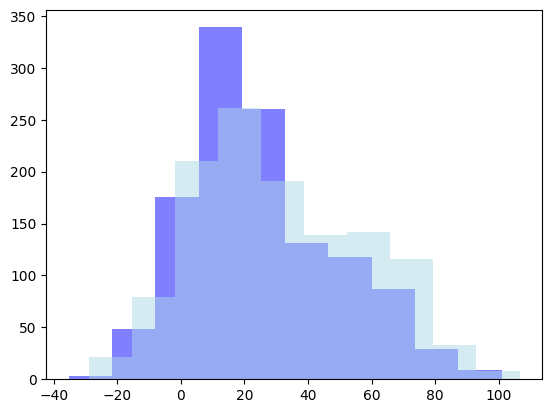

In [5]:
program_baseline= london_coach_training.participant_outcomes(mean_active = 60, mean_inactive = 15, sd = 15, baseline=True)

program_results= london_coach_training.participant_outcomes(mean_active = 60, mean_inactive = 15, sd = 15, baseline=False)

plt.hist(program_baseline, color='blue', alpha = 0.5)

plt.hist(program_results, color='lightblue', alpha = 0.5)